In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import random

In [2]:
data = pd.read_csv("data.csv", header = 0)

In [3]:
X = data.iloc[:, 2:32].values
Y = data.iloc[:, 1: 2].values
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [4]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y.ravel())
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [5]:
np.random.seed(1)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1)

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 7, p = 2, weights = "distance")
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
accuracy_score(Y_test, Y_pred)

0.9824561403508771

In [8]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
accuracy_score(Y_test, Y_pred)

0.8245614035087719

In [9]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', multi_class='ovr')
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
accuracy_score(Y_test, Y_pred)

0.9473684210526315

In [10]:
def sigmoid(x, derivative=False):
    sigm = 1. / (1. + np.exp(-x))
    if derivative:
        return sigm * (1. - sigm)
    return sigm

def prob(w, X):
    return sigmoid(X.dot(w))

def loss(w, X, y):
    z = prob(w, X)
    N = X.shape[0]
    sum = []
    for i in range(N):
        sum.append(y[i]*np.log(z[i]) + (1-y[i])*np.log(1-z[i]))
    return -np.mean(sum)

In [11]:
from tqdm import tqdm
def logistic_regression(w_init, X, Y, lr = 0.1, epochs = 2000):
    L = [loss(w_init, X, Y)]
    N, d = X.shape[0], X.shape[1]
    w = w_old = w_init
    for i in tqdm(range(epochs)):
        p = np.random.permutation(N)
        X = X[p];
        Y = Y[p]
        for i in range(N):
            h = sigmoid(X[i].dot(w))
            w = w - lr*(h-Y[i])*X[i]
        L.append(loss(w, X, Y))
        if np.linalg.norm(w-w_old)/d < 1e-6:
            break;
        w_old = w
    return w, L


In [12]:
np.random.seed(1)
w_init = np.random.randn(X_train.shape[1], 1)
w, L = logistic_regression(w_init, X_train, Y_train)

100%|██████████| 2000/2000 [00:20<00:00, 102.00it/s]


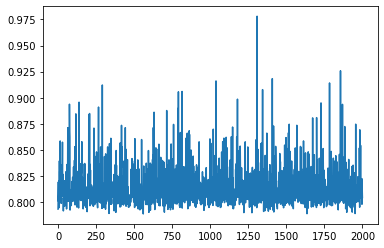

0.8046136470908907


In [14]:
plt.plot(L)
plt.show()
print(L[-1])